As a reminder the objective of this study is to predict the `total claim amount` of a customer and study/investigate the impact of the factors (input features) on the target variable(`total claim amount`). That means in your exploratory data analysis, you have to look for patterns in this data that shows interesting relationships among the input features as well as with relation to the target feature.

1) Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
2) Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms.
  - Do the distributions for different numerical variables look like a normal distribution? No.  
3) For the numerical variables, check the multicollinearity between the input features. multicollinearity does not include the target feature.
4) Plot the Correlation Heatmap.
- (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [1]:
# import libraries to use (pandas, matplotlib.pyplot and seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#def load_original_data():
 #   marketing_df = pd.read_csv('marketing_df.csv')

In [3]:
marketing_df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
marketing_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [4]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [5]:
#creating two tables - one for numerical and one for categorical values 
numerical = marketing_df.select_dtypes(include='number')
categorical = marketing_df.select_dtypes(include='object')

In [6]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [7]:
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


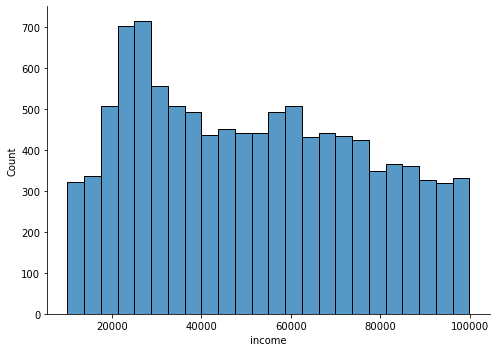

In [8]:
sns.displot(data=marketing_df, x="income", kind="hist",aspect=1.4)

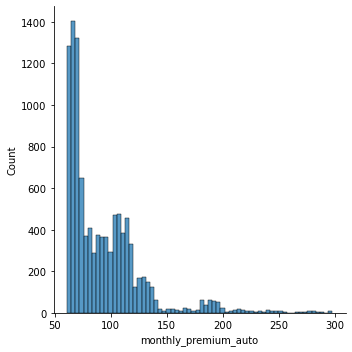

In [9]:
sns.displot(
  data=marketing_df,
  x="monthly_premium_auto",
  kind="hist",
)

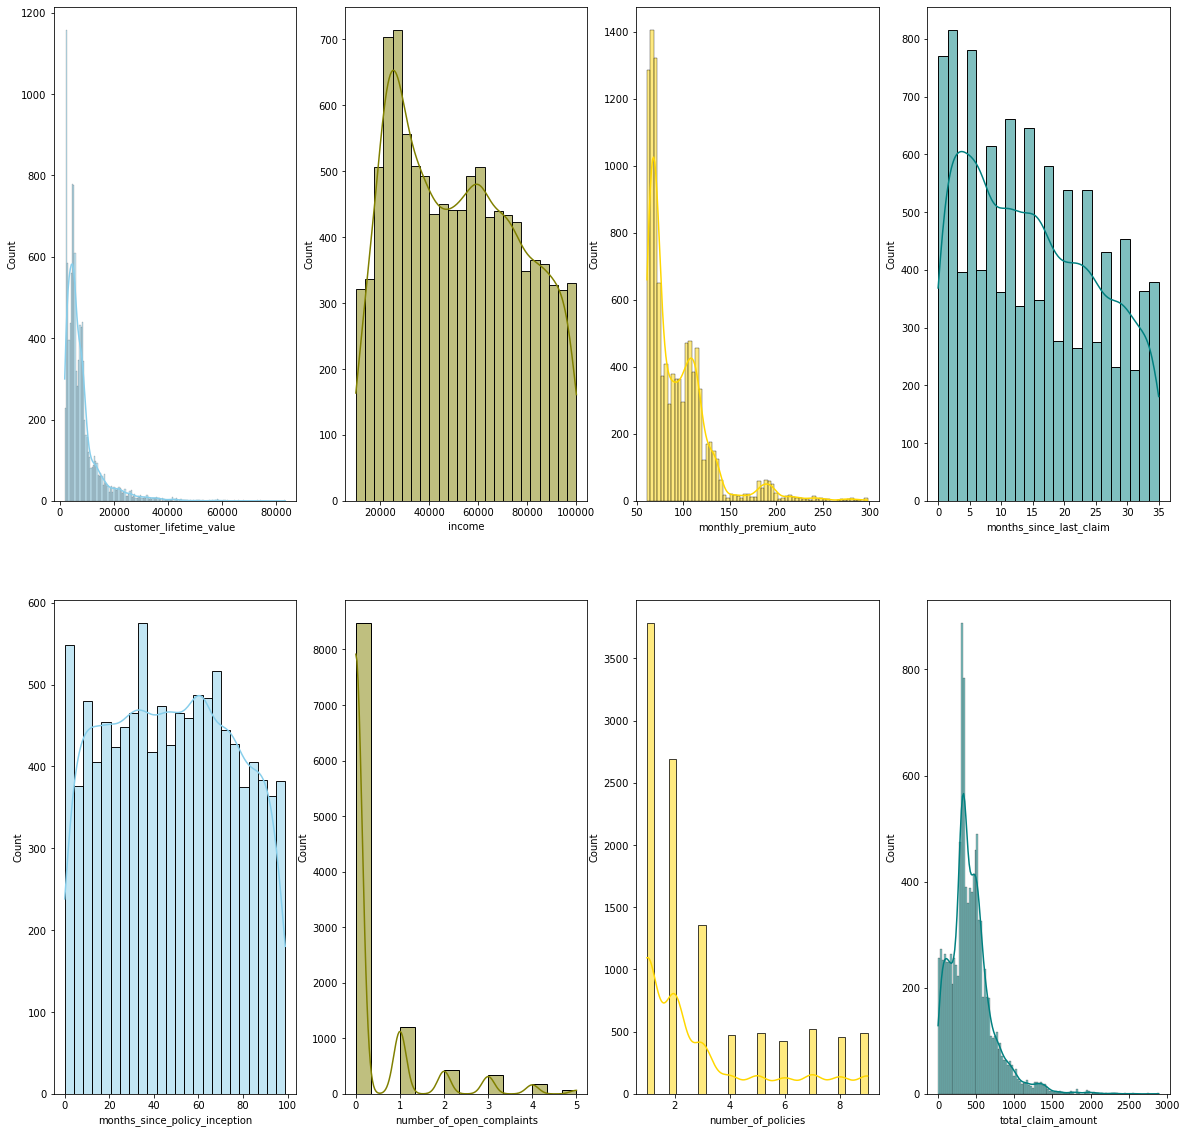

In [10]:
fig, axs = plt.subplots(2, 4, figsize=(20, 20))
sns.histplot(data=numerical, x='customer_lifetime_value', kde=True, color='skyblue', ax=axs[0, 0])
sns.histplot(data=numerical, x='income', kde=True, color='olive', ax=axs[0, 1])
sns.histplot(data=numerical, x='monthly_premium_auto', kde=True, color='gold', ax=axs[0, 2])
sns.histplot(data=numerical, x='months_since_last_claim', kde=True, color='teal', ax=axs[0, 3])
sns.histplot(data=numerical, x='months_since_policy_inception', kde=True, color='skyblue', ax=axs[1, 0])
sns.histplot(data=numerical, x='number_of_open_complaints', kde=True, color='olive', ax=axs[1, 1])
sns.histplot(data=numerical, x='number_of_policies', kde=True, color='gold', ax=axs[1, 2])
sns.histplot(data=numerical, x='total_claim_amount', kde=True, color='teal', ax=axs[1, 3])
plt.show()

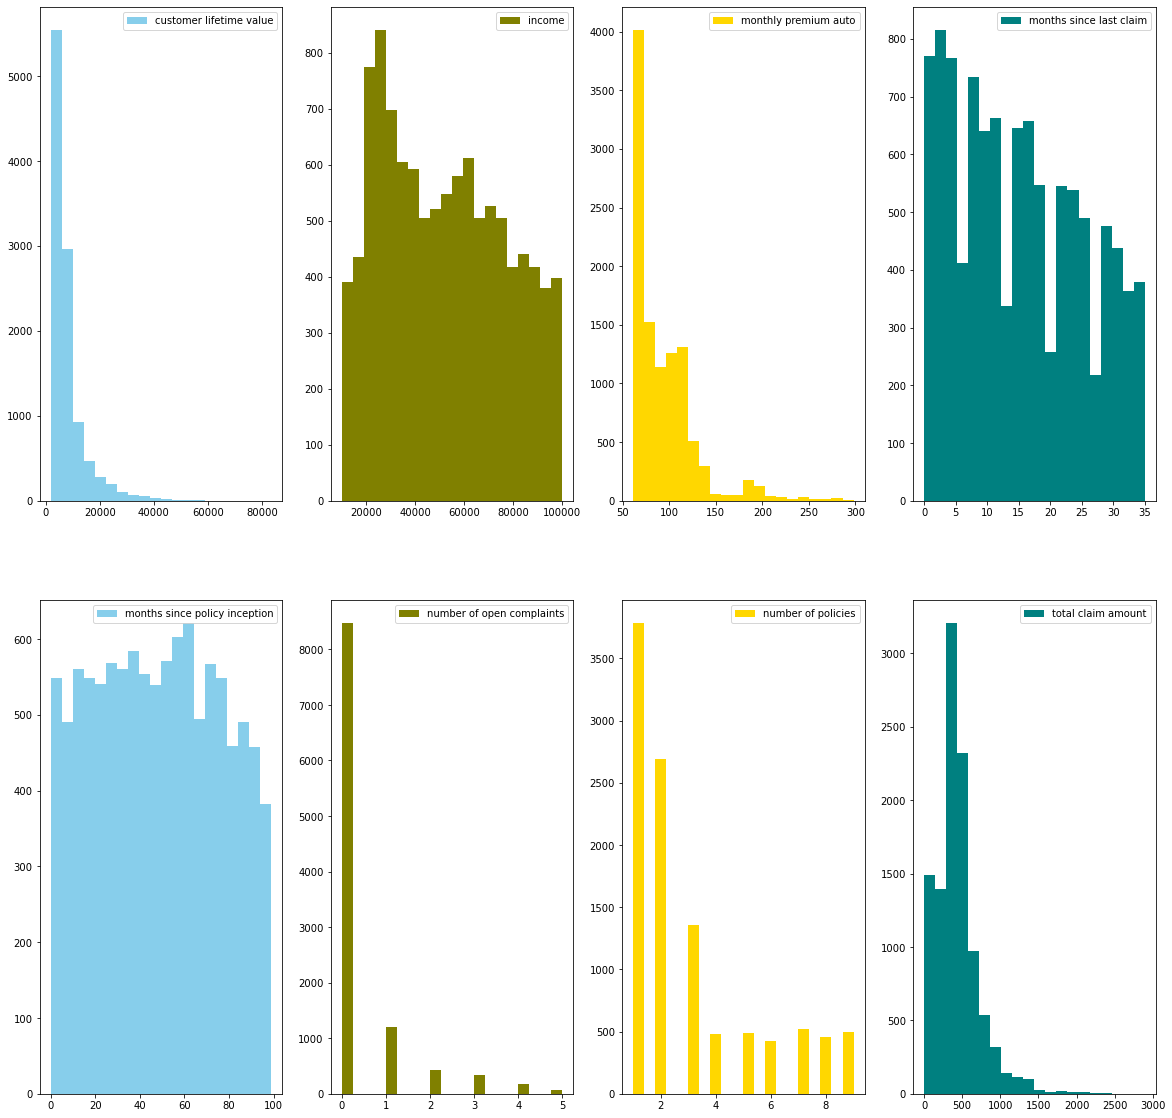

In [11]:
fig2, axes2 = plt.subplots(2,4,figsize = (20,20))
axes2[0,0].hist(numerical['customer_lifetime_value'],bins=20,color='skyblue', label='customer lifetime value')
axes2[0,1].hist(numerical['income'],bins=20, color='olive',label='income')
axes2[0,2].hist(numerical['monthly_premium_auto'],bins=20, color='gold', label='monthly premium auto')
axes2[0,3].hist(numerical['months_since_last_claim'],bins=20, color='teal',label='months since last claim')
axes2[1,0].hist(numerical['months_since_policy_inception'],bins=20,color='skyblue',label='months since policy inception')
axes2[1,1].hist(numerical['number_of_open_complaints'],bins=20, color='olive',label='number of open complaints')
axes2[1,2].hist(numerical['number_of_policies'],bins=20, color='gold',label='number of policies')
axes2[1,3].hist(numerical['total_claim_amount'],bins=20, color='teal',label='total claim amount')
for a in range(2):
    for b in range(4):
        axes2[a,b].legend()

In [12]:
marketing_df['total_claim_amount'].value_counts()

316     147
292     143
350     137
312     128
331     123
       ... 
816       1
1980      1
1543      1
1562      1
1621      1
Name: total_claim_amount, Length: 1172, dtype: int64

<AxesSubplot:>

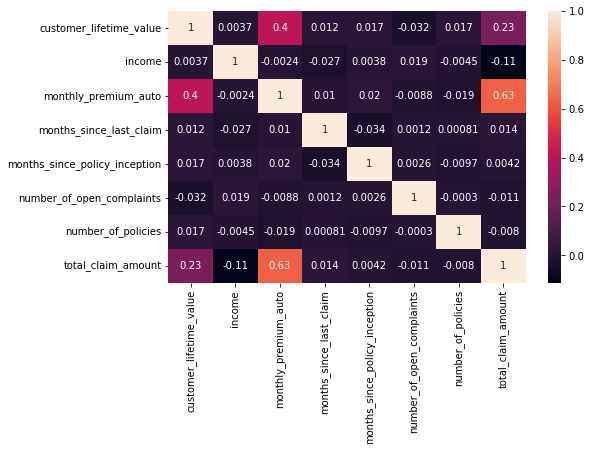

In [13]:
#heatmap to check the correlation between the dif values 
fig=plt.figure(figsize=(8,5))
sns.heatmap(marketing_df.corr(),annot=True)

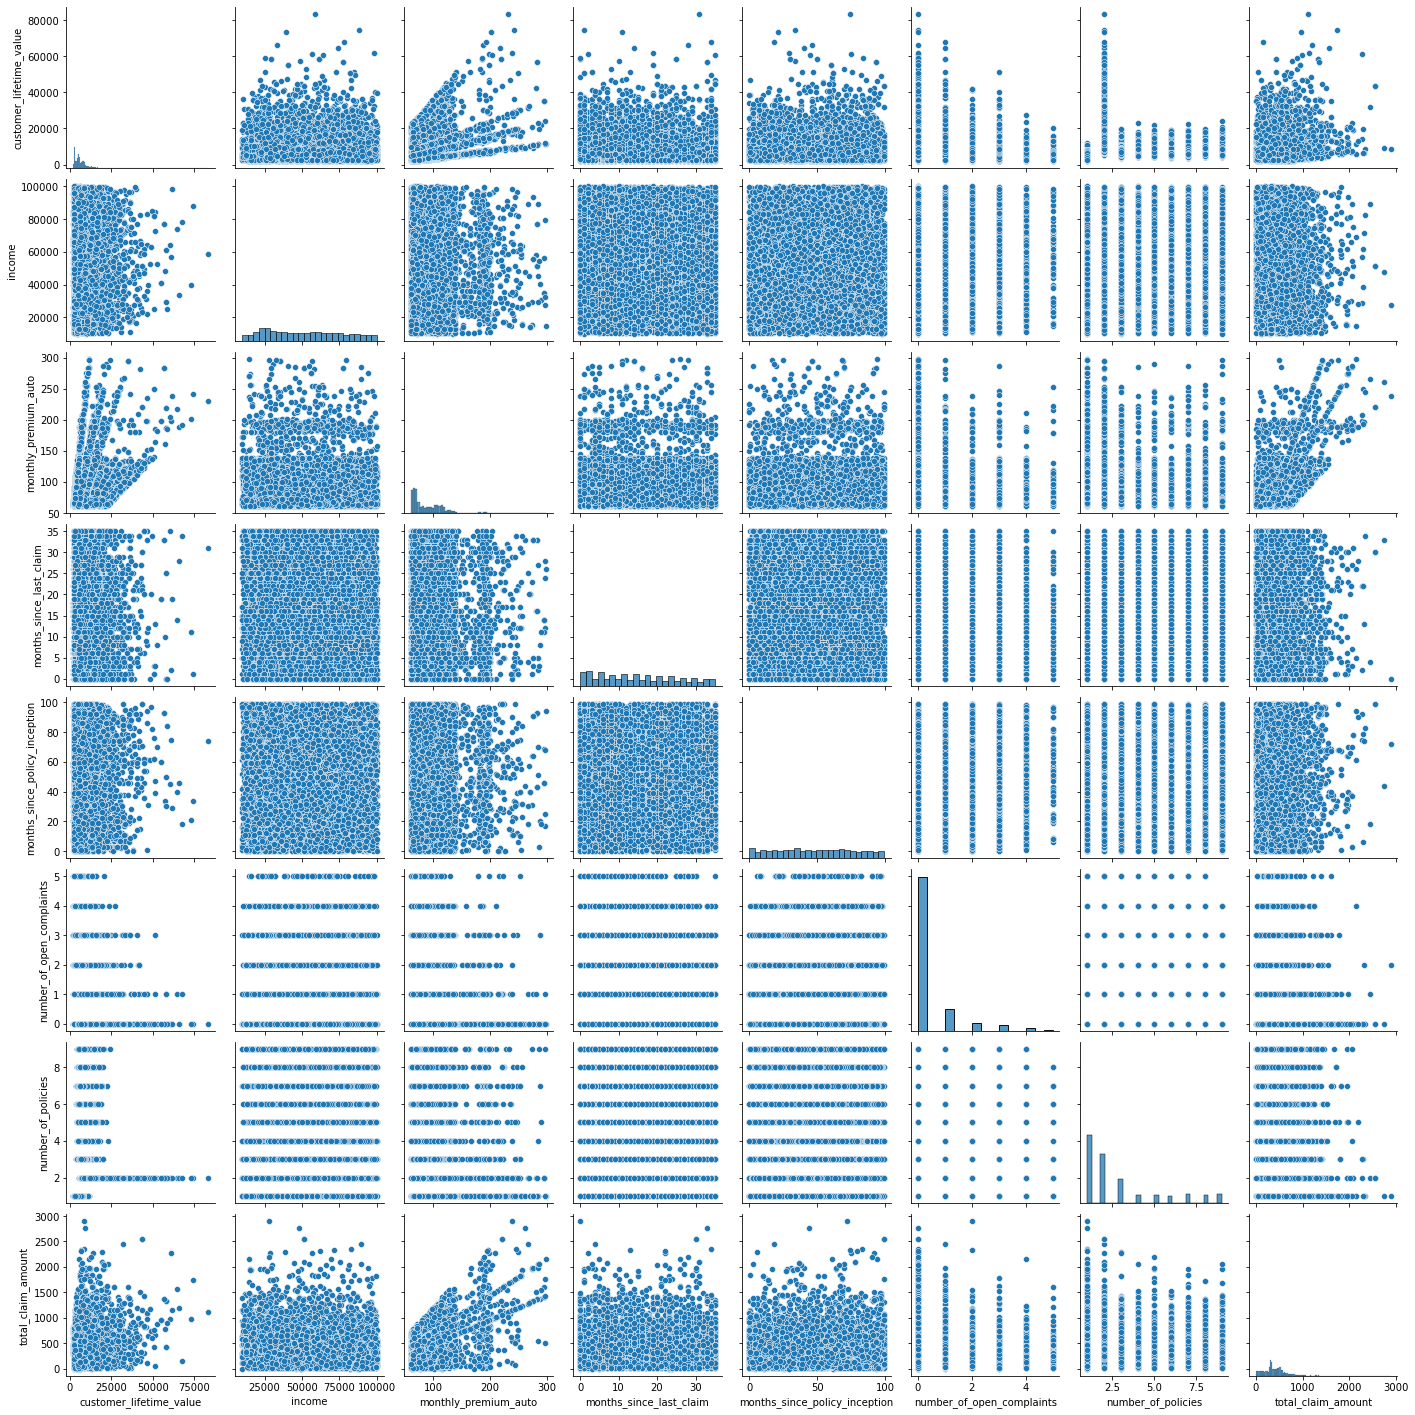

In [14]:
sns.pairplot(marketing_df)

In [15]:
marketing_df['customer_lifetime_value'].value_counts()

6005     14
5107     14
2491     13
9095     13
8382     13
         ..
5924      1
4095      1
10747     1
15936     1
11971     1
Name: customer_lifetime_value, Length: 5676, dtype: int64

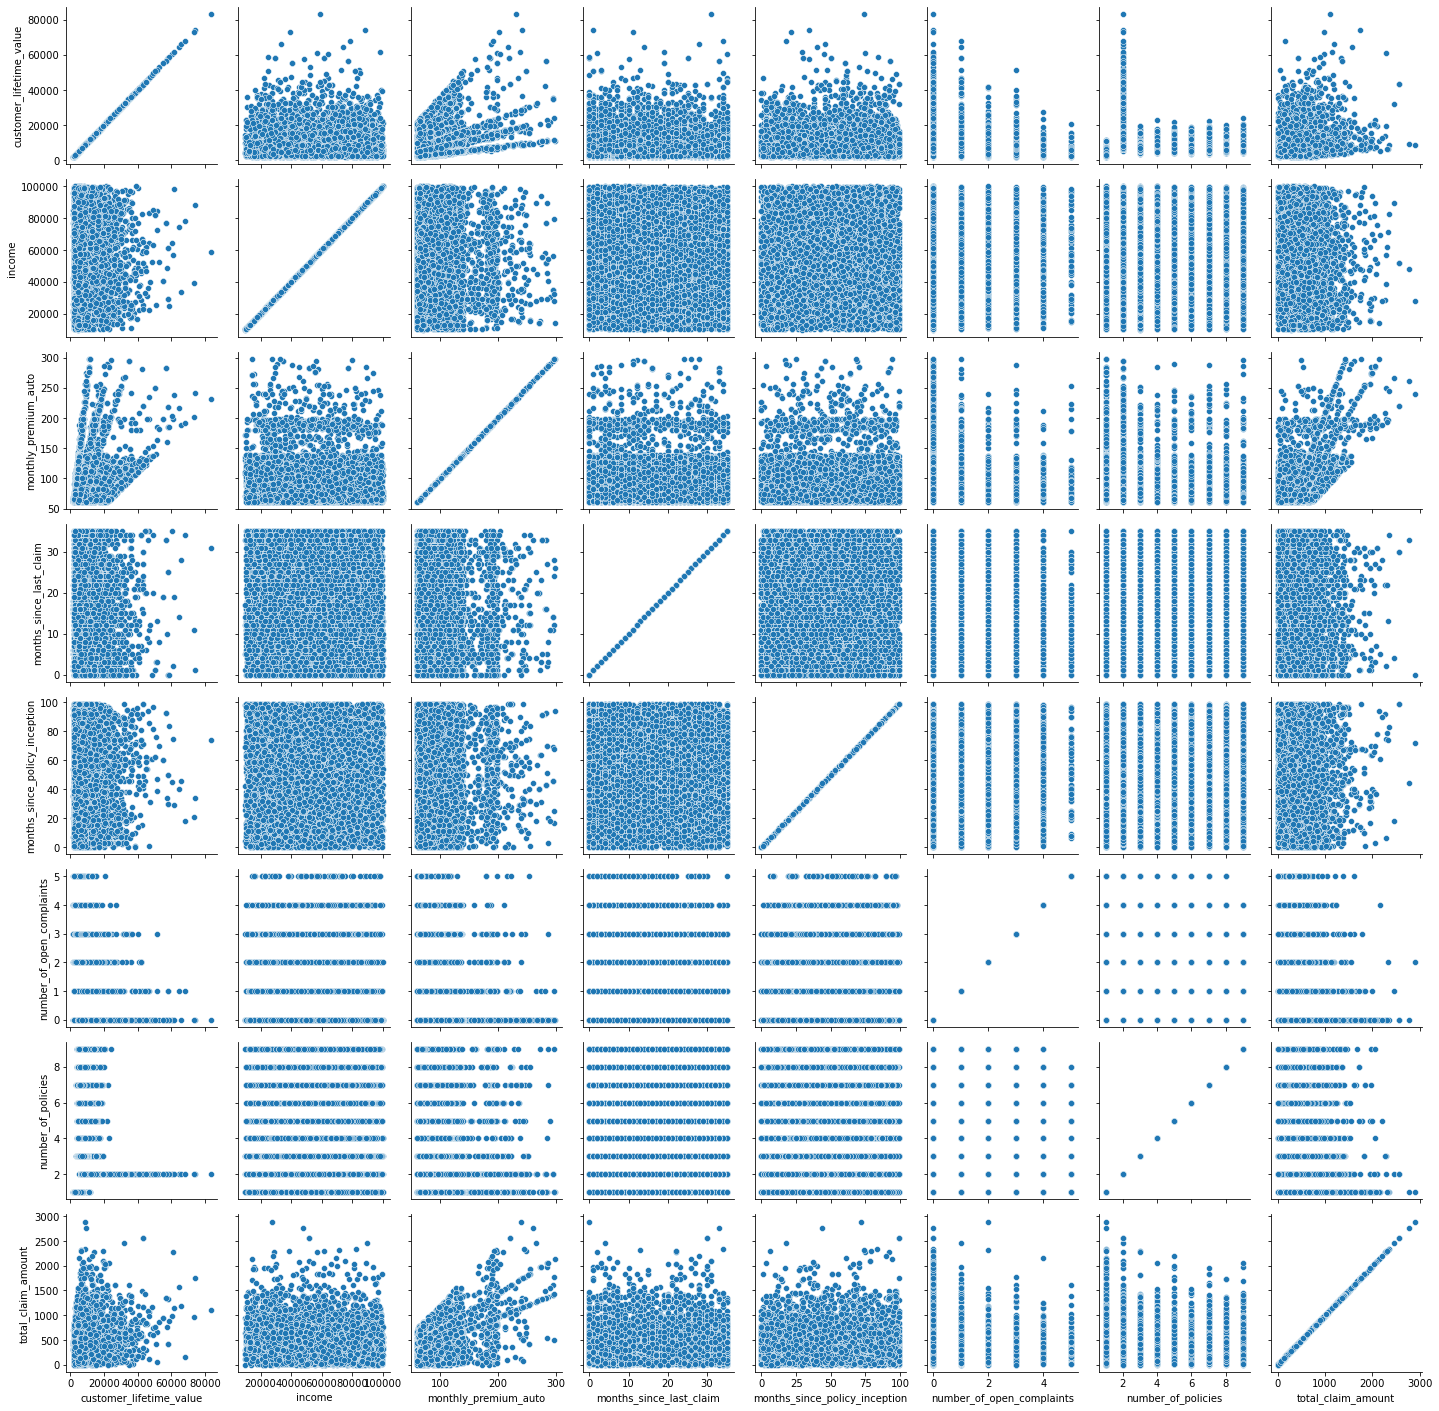

In [16]:
g=sns.PairGrid(numerical)
g.map(sns.scatterplot)

Text(0.5, 1.0, 'Response Rate')

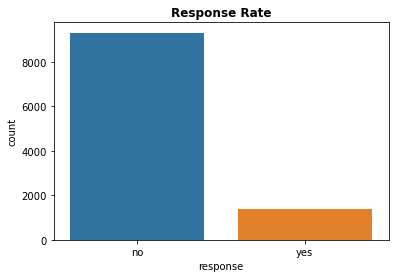

In [17]:
#Plot of the total number of responses.
sns.countplot(x = 'response', data = marketing_df)
plt.title('Response Rate', fontweight='bold')

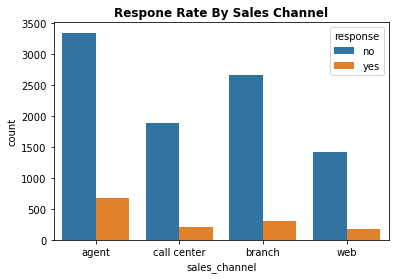

In [18]:
#plot of the response by the sales channel (two variables)
sns.countplot(x ='sales_channel', hue = "response", data = marketing_df)
plt.title('Respone Rate By Sales Channel', fontweight='bold')
# Show the plot
plt.show()

In [19]:
marketing_df['total_claim_amount'].value_counts()

316     147
292     143
350     137
312     128
331     123
       ... 
816       1
1980      1
1543      1
1562      1
1621      1
Name: total_claim_amount, Length: 1172, dtype: int64

In [20]:
marketing_df['response'].value_counts()

no     9316
yes    1373
Name: response, dtype: int64

In [21]:
#creating a new column in order to have less values: used the round function to group the values by 100
marketing_df['rounded claim amount'] = marketing_df['total_claim_amount'].apply(round,ndigits=-2)
marketing_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,rounded claim amount
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize,300
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize,700
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize,500
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize,500
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize,1200
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize,300
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize,400
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize,600


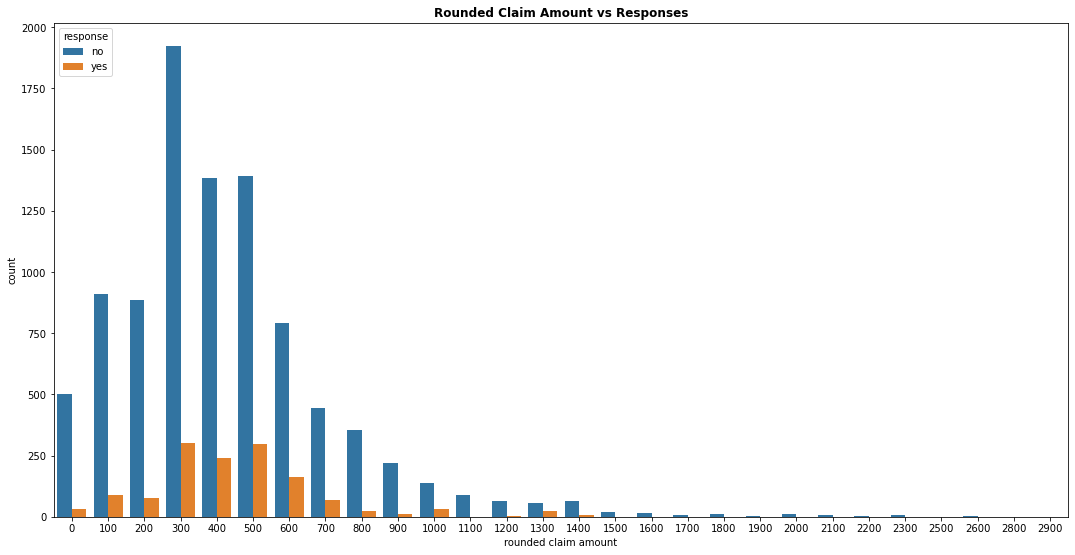

In [22]:
#plotting the new column vs response 
plt.figure(figsize=(40,20))
plt.subplot(2,2,1)
#plot of the response by the sales channel (two variables)
sns.countplot(x ='rounded claim amount', hue = 'response', data = marketing_df)
plt.title('Rounded Claim Amount vs Responses', fontweight='bold')
# Show the plot
plt.show()

In [23]:
marketing_df['rounded claim amount'].value_counts()

300     2223
500     1690
400     1628
100     1002
200      963
600      955
0        530
700      512
800      376
900      230
1000     173
1100      92
1300      81
1400      71
1200      69
1500      19
1600      16
1800      13
2000      13
1700       9
2300       6
2100       6
1900       5
2200       2
2600       2
2500       1
2900       1
2800       1
Name: rounded claim amount, dtype: int64

In [24]:
#creating a new column in order to have less values: used the round function to group the values
marketing_df['rounded income'] = marketing_df['income'].apply(round,ndigits=-4)
marketing_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,rounded claim amount,rounded income
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize,300,50000
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize,700,90000
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,2,personal auto,personal l3,offer3,call center,480,suv,medsize,500,20000
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize,500,50000
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize,700,20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize,1200,60000
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize,300,60000
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize,400,40000
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,6,personal auto,personal l1,offer1,branch,618,suv,medsize,600,60000


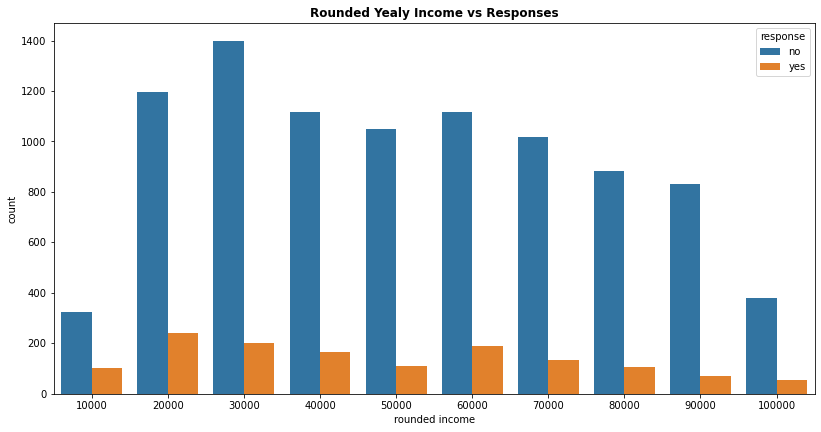

In [25]:
#plotting the new column vs response 
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
sns.countplot(x ='rounded income', hue = 'response', data = marketing_df)
plt.title('Rounded Yealy Income vs Responses', fontweight='bold')
# Show the plot
plt.show()

In [26]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = categorical.response
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['no' 'no' 'no' ... 'no' 'no' 'no']
[0 0 0 ... 0 0 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
['no']


In [27]:
data = categorical.region
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['central' 'west region' 'east' ... 'central' 'west region' 'central']
[0 3 1 ... 0 3 0]
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
['central']


In [28]:
marketing_df['region'].value_counts()

west region    3678
central        3071
north west     3011
east            929
Name: region, dtype: int64

In [29]:
data = categorical.gender
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['m' 'f' 'm' ... 'f' 'f' 'm']
[1 0 1 ... 0 0 1]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
['m']


In [30]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
data = [(categorical.month)]
print(data)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)

[0        feb
1        jan
2        feb
3        jan
4        jan
        ... 
10684    jan
10685    jan
10686    feb
10687    feb
10688    jan
Name: month, Length: 10689, dtype: object]
[[0. 0. 0. ... 0. 0. 0.]]


In [31]:
pd.get_dummies(categorical)

,region_central,region_east,region_north west,region_west region,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,education_bachelor,...,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small
0,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,1,0,0,0,1,1,...,1,0,1,0,0,0,0,0,1,0
10685,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
10686,1,0,0,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
10687,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [32]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
categorical["region"]= label_encoder.fit_transform(categorical["region"])
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,0,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,3,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,1,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,2,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,2,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,2,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,0,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,3,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [33]:
marketing_df['vehicle_class'].value_counts()

four-door car    5424
two-door car     2185
suv              2103
sports car        565
luxury suv        213
luxury car        199
Name: vehicle_class, dtype: int64

In [34]:
#OneHotEncoder: 
data = categorical.month
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['feb' 'jan' 'feb' ... 'feb' 'feb' 'jan']
[0 1 0 ... 0 0 1]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
['feb']


In [35]:
def labelenc(df):
    for cars in df.columns.values:
        #df[c].unique()
        df[cars] = label_encoder.fit_transform(df[cars])
    
x = labelenc(categorical)
categorical.head()  

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,0,0,0,1,40,0,1,1,1,1,0,2,2,0,0,1
1,3,0,0,1,9,1,4,0,1,2,1,5,3,2,0,1
2,1,0,0,0,32,0,1,1,1,2,1,5,2,2,4,1
3,2,1,1,1,2,1,1,1,1,2,0,2,1,1,0,1
4,2,0,2,0,8,1,2,0,1,1,1,4,0,1,0,1


In [36]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
data = [(categorical.month)]
print(data)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
#testdf=pd.DataFrame(result)
#testdf2=pd.DataFrame(data)
#testdf2

[0        0
1        1
2        0
3        1
4        1
        ..
10684    1
10685    1
10686    0
10687    0
10688    1
Name: month, Length: 10689, dtype: int64]


In [37]:
#x y split 
X=marketing_df.drop('total_claim_amount', axis=1)
y=pd.DataFrame(marketing_df['total_claim_amount'])

In [38]:
X=X._get_numeric_data()
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,rounded claim amount,rounded income
0,4809,48029,61,7,52,0,9,300,50000
1,2228,92260,64,3,26,0,1,700,90000
2,14947,22139,100,34,31,0,2,500,20000
3,22332,49078,97,10,3,0,2,500,50000
4,9025,23675,117,33,31,0,7,700,20000
...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1200,60000
10685,5259,61146,65,7,68,0,6,300,60000
10686,23893,39837,201,11,63,0,2,400,40000
10687,11971,64195,158,0,27,4,6,600,60000


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


In [40]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [41]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,rounded claim amount,rounded income
0,4809,48029,61,7,52,0,9,300,50000
1,2228,92260,64,3,26,0,1,700,90000
2,14947,22139,100,34,31,0,2,500,20000
3,22332,49078,97,10,3,0,2,500,50000
4,9025,23675,117,33,31,0,7,700,20000
...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1200,60000
10685,5259,61146,65,7,68,0,6,300,60000
10686,23893,39837,201,11,63,0,2,400,40000
10687,11971,64195,158,0,27,4,6,600,60000


In [42]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [43]:
X_train.shape

(7482, 9)

In [44]:
X_train = X_train.drop(['rounded claim amount','rounded income'],axis=1)

In [45]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
6608,7271,20545,70,23,86,0,2
5697,5079,70474,68,6,95,0,5
10524,4428,58577,110,6,62,0,1
397,22332,49078,97,10,3,0,2
6324,2430,26182,70,29,30,0,1
...,...,...,...,...,...,...,...
9785,3086,73938,76,34,48,0,1
7763,5658,78834,72,14,20,2,8
5218,2434,23033,62,5,9,0,1
1346,23594,76358,66,25,3,0,2


In [46]:
X_test_scaled=std_scaler.transform(X_test)
X_test = X_test.drop(['rounded claim amount','rounded income'],axis=1)
X_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
4665,5205,91160,72,18,91,0,9
4072,2790,28786,71,30,69,1,1
4549,11981,21514,62,0,59,0,2
4211,5872,77156,73,30,39,0,7
3081,9403,56410,117,13,73,0,3
...,...,...,...,...,...,...,...
3488,22658,23665,67,19,50,0,2
1667,8930,13876,82,25,63,0,2
1516,2522,25840,73,24,15,0,1
10215,5096,27940,65,21,3,1,4


In [47]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823 ... -0.40381143 -0.44470311
  -1.27762334]
 [-0.42794064  0.74729478 -0.72925469 ...  0.84759702 -0.44470311
   0.72086676]
 [-0.5223013   0.26592193  0.48489091 ... -0.82094758 -0.44470311
   0.32116874]
 ...
 [-0.81132612 -1.17224873 -0.90270406 ... -0.82094758  0.22896943
  -1.27762334]
 [ 2.25575772  0.98537142 -0.78707115 ... -0.40381143 -1.11837565
   1.12056478]
 [ 1.18923585  0.68583346 -0.55580532 ... -0.40381143  0.90264197
   0.72086676]]
--------
[[-0.40967729  1.58428551 -0.61362178 ...  2.51614162 -0.44470311
   1.5202628 ]
 [-0.7597249  -0.93947257 -0.64253    ... -0.82094758 -0.44470311
  -0.87792532]
 [ 0.57248529 -1.23371005 -0.90270406 ... -0.40381143 -0.44470311
  -1.27762334]
 ...
 [-0.79857077 -1.05867274 -0.58471355 ... -0.82094758 -0.10786684
  -0.87792532]
 [-0.42547654 -0.97370317 -0.81597938 ...  0.43046087 -1.45521192
  -0.87792532]
 [-0.49881985 -0.95695203  0.71615674 ... -0.82094758 -0.44470311
  -0.87792532]]


In [48]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 8.612e+04
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:27:59   Log-Likelihood:                -35743.
No. Observations:                7482   AIC:                         7.151e+04
Df Residuals:                    7472   BIC:                         7.158e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      0.332   1302.518      0.0